Proyecto Poster - Red Clasificación Ropa
==

El objetivo de este trabajo es crear una red neuronal para clasificar vestimenta.  Este es el proyecto final de la clase Clasificación y Reconocimiento de Patrones de la Universidad Nacional de Colombia Medellin (2019-2020)

### Cargue de librerias


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from sklearn.metrics import confusion_matrix
import warnings

import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.metrics import categorical_accuracy, top_k_categorical_accuracy

In [2]:
plt.style.use('ggplot')
warnings.filterwarnings("ignore")

### Cargue de datos

El conjunto de datos son 17117 imagenes de prendas de vestir clasificadas en 19 clases.  Este está desbalanceado, lo que implicará hacer ampliación de datos, para este ejercicio ebn particular, usaremos las funciones de open cv para crear más imagenes.

In [3]:
CATEGORIES = os.listdir("Input")
CATEGORIES

['MUJER-SHORT',
 'MUJER-CAMISA',
 'MUJER-JOGGER',
 'HOMBRE-PANTALÓN',
 'MUJER-TOP ML',
 'HOMBRE-BUSO',
 'MUJER-BUSO',
 'HOMBRE-POLO',
 'MUJER-TOP',
 'HOMBRE-SHORT',
 'MUJER-PANTALÓN',
 'MUJER-VESTIDO',
 'HOMBRE-CAMISA',
 'HOMBRE-CHAQUETA',
 'HOMBRE-CAMISETA',
 'MUJER-CHAQUETA',
 'HOMBRE-JOGGER',
 'HOMBRE-TANK',
 'MUJER-FALDA']

In [4]:
CATEGORIES_2 = list(categiorie for categiorie in CATEGORIES if categiorie != 'MUJER-TOP' and  categiorie != 'HOMBRE-CAMISETA')
#list( myBigList[i] for i in [87, 342, 217, 998, 500] )
print(len(CATEGORIES),len(CATEGORIES_2 ))
CATEGORIES_2

19 17


['MUJER-SHORT',
 'MUJER-CAMISA',
 'MUJER-JOGGER',
 'HOMBRE-PANTALÓN',
 'MUJER-TOP ML',
 'HOMBRE-BUSO',
 'MUJER-BUSO',
 'HOMBRE-POLO',
 'HOMBRE-SHORT',
 'MUJER-PANTALÓN',
 'MUJER-VESTIDO',
 'HOMBRE-CAMISA',
 'HOMBRE-CHAQUETA',
 'MUJER-CHAQUETA',
 'HOMBRE-JOGGER',
 'HOMBRE-TANK',
 'MUJER-FALDA']

In [5]:
cont_1 = 0
cont_2 = 0
for folder in os.listdir("Input"):
    aux_rootDir = os.path.join('Input',folder)
    for file in os.listdir(aux_rootDir):
        cont_1 += 1
    cont_2 += cont_1
    print('By class',folder, ": "  , cont_1 , ' and accumulated:', cont_2 )
    cont_1 = 0

By class MUJER-SHORT :  413  and accumulated: 413
By class MUJER-CAMISA :  624  and accumulated: 1037
By class MUJER-JOGGER :  340  and accumulated: 1377
By class HOMBRE-PANTALÓN :  380  and accumulated: 1757
By class MUJER-TOP ML :  803  and accumulated: 2560
By class HOMBRE-BUSO :  651  and accumulated: 3211
By class MUJER-BUSO :  659  and accumulated: 3870
By class HOMBRE-POLO :  551  and accumulated: 4421
By class MUJER-TOP :  4813  and accumulated: 9234
By class HOMBRE-SHORT :  298  and accumulated: 9532
By class MUJER-PANTALÓN :  402  and accumulated: 9934
By class MUJER-VESTIDO :  1139  and accumulated: 11073
By class HOMBRE-CAMISA :  268  and accumulated: 11341
By class HOMBRE-CHAQUETA :  94  and accumulated: 11435
By class HOMBRE-CAMISETA :  4279  and accumulated: 15714
By class MUJER-CHAQUETA :  106  and accumulated: 15820
By class HOMBRE-JOGGER :  286  and accumulated: 16106
By class HOMBRE-TANK :  732  and accumulated: 16838
By class MUJER-FALDA :  279  and accumulated: 171

In [6]:
def loadTrainingData(rootDir, IMG_S):
    count_1=0
    count_2=0
    count_3=0
    path_t = rootDir
    for categorie in CATEGORIES:
        PATH = os.path.join(path_t,categorie)
        class_num = CATEGORIES.index(categorie)
        for img in os.listdir(PATH):
            image = os.path.join(PATH, img)
            image = cv2.imread(image, cv2.IMREAD_ANYCOLOR)
            image = cv2.resize(image , (IMG_S, IMG_S))
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            X.append(image)
            Y.append(class_num)
            count_1 +=1
            count_2 +=1
            
            if categorie != 'MUJER-TOP' and categorie != 'HOMBRE-CAMISETA':           
                X.append(cv2.flip(image, 0))  # La diferencia con 1 y -1, es q' este hace un giro completo en espejo
                Y.append(class_num)
                count_2 +=1 
                X.append(cv2.flip(image, 1))  # Vertical, que se hizo en la ampliación de datos
                Y.append(class_num)
                count_2 +=1 
                X.append(cv2.flip(image, -1)) # horizontal, que se hizo en la ampliación de datos
                Y.append(class_num)                
                count_2 +=1 
                X.append(cv2.rotate(image,cv2.ROTATE_90_CLOCKWISE))
                Y.append(class_num)
                count_2 +=1 
                
                if len(os.listdir(PATH))<700: 
                    
                    X.append(cv2.rotate(image,cv2.ROTATE_90_COUNTERCLOCKWISE))
                    Y.append(class_num)
                    count_2 +=1 

                    lookUpTable = np.empty((1,256), np.uint8)

                    gamma = np.random.random_integers(20,70)/100                

                    for i in range(256):
                        lookUpTable[0,i] = np.clip(pow(i / 255.0, gamma) * 255.0, 0, 255)

                    X.append(cv2.LUT(image, lookUpTable))
                    Y.append(class_num)
                    count_2 +=1   
                
                if len(os.listdir(PATH))<500:   
                    
                    alpha = np.random.random_integers(60, 90+1)/100
                    beta =  np.random.random_integers(30, 90)


                    X.append(cv2.convertScaleAbs(image, alpha=1, beta=beta))
                    Y.append(class_num)
                    count_2 +=1                
                    X.append(cv2.convertScaleAbs(image, alpha=alpha, beta=0))
                    Y.append(class_num)
                    count_2 +=1                 
                    X.append(cv2.convertScaleAbs(image, alpha=alpha, beta=beta))
                    Y.append(class_num)
                    count_2 +=1


                
        count_3 += count_2
        print('By class',categorie, " images: ", count_1, " augmented:", count_2 , ' and accumulated:', count_3 )
        count_1 = 0
        count_2 = 0

In [7]:
X=[]
Y=[]
IMG_S = 128
rootDir = "Input"

In [8]:
loadTrainingData(rootDir, IMG_S)

By class MUJER-SHORT  images:  413  augmented: 4130  and accumulated: 4130
By class MUJER-CAMISA  images:  624  augmented: 4368  and accumulated: 8498
By class MUJER-JOGGER  images:  340  augmented: 3400  and accumulated: 11898
By class HOMBRE-PANTALÓN  images:  380  augmented: 3800  and accumulated: 15698
By class MUJER-TOP ML  images:  803  augmented: 4015  and accumulated: 19713
By class HOMBRE-BUSO  images:  651  augmented: 4557  and accumulated: 24270
By class MUJER-BUSO  images:  659  augmented: 4613  and accumulated: 28883
By class HOMBRE-POLO  images:  551  augmented: 3857  and accumulated: 32740
By class MUJER-TOP  images:  4813  augmented: 4813  and accumulated: 37553
By class HOMBRE-SHORT  images:  298  augmented: 2980  and accumulated: 40533
By class MUJER-PANTALÓN  images:  402  augmented: 4020  and accumulated: 44553
By class MUJER-VESTIDO  images:  1139  augmented: 5695  and accumulated: 50248
By class HOMBRE-CAMISA  images:  268  augmented: 2680  and accumulated: 52928


In [9]:
X = np.array(X)/255.
Y = np.array(Y)
X.shape

(68517, 128, 128, 3)

In [10]:
def one_hottie(labels,C):
    One_hot_matrix = tf.one_hot(labels,C)
    return tf.keras.backend.eval(One_hot_matrix)
Y = one_hottie(Y, len(CATEGORIES))
print ("Y shape: " + str(Y.shape))

Y shape: (68517, 19)


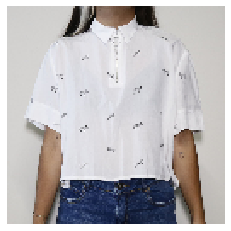

In [11]:
plt.axis('off')
plt.imshow(X[4368])

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.15, random_state = 0)
del X
del Y

In [13]:
# Hands-On Convolutional Neural Networks with TensorFlow VGG16

i = Input(shape = (IMG_S,IMG_S,3))
x = Conv2D(128, (3,3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
x = Conv2D(256, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(256, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
x = Conv2D(512, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(512, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(512, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
x = Conv2D(512, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(512, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(512, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
x = Conv2D(512, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
x = Conv2D(512, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Flatten()(x)

#x = Dropout(0.2)(x)
#x = Dense(4096, activation = 'relu', kernel_regularizer= l2(0.001))(x)
x = Dropout(0.2)(x)
x = Dense(2048, activation = 'relu', kernel_regularizer= l2(0.001))(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation = 'relu', kernel_regularizer= l2(0.001))(x)
x = Dropout(0.2)(x)
x = Dense(19, activation = 'softmax', kernel_regularizer= l2(0.001))(x)

model = Model(i ,x)

In [14]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 128, 128, 128)     3584      
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 128)     512       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 128)     147584    
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 128, 128)     512       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 256)       295168

In [15]:
def top_3_accuracy(y_true, y_pred):
    return top_k_categorical_accuracy(y_true, y_pred, k=3)

#def top_2_accuracy(y_true, y_pred):
#    return top_k_categorical_accuracy(y_true, y_pred, k=2)

In [16]:
initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=2145,
    decay_rate=0.9,
    staircase=True)

In [17]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule), 
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [18]:
Y_train.shape

(58239, 19)

In [19]:
filepath = "modelo_04_100_epochs_vgg16_modificado_2_sin_transfer_data_ampl.h5"

In [20]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1,
                             save_best_only=True, mode='max')

In [21]:
callbacks_list = [checkpoint]

In [22]:
BATCHES = 64
EPOCHS = 55

In [23]:
result = model.fit(x=X_train,
                   y=Y_train,
                   batch_size=BATCHES,
                   epochs=EPOCHS,
                   verbose=1,
                   shuffle=False,
                   initial_epoch=0,
                   validation_split=0.125,
                   callbacks=callbacks_list)
# 11:20

Train on 50959 samples, validate on 7280 samples
Epoch 1/55
50944/50959 [============================>.] - ETA: 0s - loss: 3.3640 - accuracy: 0.4008
Epoch 00001: val_accuracy improved from -inf to 0.25701, saving model to modelo_04_100_epochs_vgg16_modificado_2_sin_transfer_data_ampl.h5
50959/50959 [==============================] - 492s 10ms/sample - loss: 3.3635 - accuracy: 0.4009 - val_loss: 2.9072 - val_accuracy: 0.2570
Epoch 2/55
50944/50959 [============================>.] - ETA: 0s - loss: 1.4399 - accuracy: 0.6308
Epoch 00002: val_accuracy improved from 0.25701 to 0.66703, saving model to modelo_04_100_epochs_vgg16_modificado_2_sin_transfer_data_ampl.h5
50959/50959 [==============================] - 480s 9ms/sample - loss: 1.4398 - accuracy: 0.6308 - val_loss: 1.2978 - val_accuracy: 0.6670
Epoch 3/55
50944/50959 [============================>.] - ETA: 0s - loss: 1.0552 - accuracy: 0.7233
Epoch 00003: val_accuracy did not improve from 0.66703
50959/50959 [=======================

50959/50959 [==============================] - 491s 10ms/sample - loss: 0.0870 - accuracy: 0.9931 - val_loss: 0.4254 - val_accuracy: 0.9109
Epoch 26/55
50944/50959 [============================>.] - ETA: 0s - loss: 0.0723 - accuracy: 0.9962
Epoch 00026: val_accuracy did not improve from 0.91085
50959/50959 [==============================] - 483s 9ms/sample - loss: 0.0723 - accuracy: 0.9962 - val_loss: 0.4359 - val_accuracy: 0.9032
Epoch 27/55
50944/50959 [============================>.] - ETA: 0s - loss: 0.0689 - accuracy: 0.9963
Epoch 00027: val_accuracy improved from 0.91085 to 0.91264, saving model to modelo_04_100_epochs_vgg16_modificado_2_sin_transfer_data_ampl.h5
50959/50959 [==============================] - 483s 9ms/sample - loss: 0.0689 - accuracy: 0.9963 - val_loss: 0.4112 - val_accuracy: 0.9126
Epoch 28/55
50944/50959 [============================>.] - ETA: 0s - loss: 0.0604 - accuracy: 0.9979
Epoch 00028: val_accuracy improved from 0.91264 to 0.91717, saving model to modelo

Epoch 51/55
50944/50959 [============================>.] - ETA: 0s - loss: 0.0234 - accuracy: 0.9999
Epoch 00051: val_accuracy did not improve from 0.92967
50959/50959 [==============================] - 479s 9ms/sample - loss: 0.0234 - accuracy: 0.9999 - val_loss: 0.3142 - val_accuracy: 0.9249
Epoch 52/55
50944/50959 [============================>.] - ETA: 0s - loss: 0.0218 - accuracy: 0.9999
Epoch 00052: val_accuracy improved from 0.92967 to 0.93132, saving model to modelo_04_100_epochs_vgg16_modificado_2_sin_transfer_data_ampl.h5
50959/50959 [==============================] - 482s 9ms/sample - loss: 0.0218 - accuracy: 0.9999 - val_loss: 0.2821 - val_accuracy: 0.9313
Epoch 53/55
50944/50959 [============================>.] - ETA: 0s - loss: 0.0210 - accuracy: 1.0000
Epoch 00053: val_accuracy did not improve from 0.93132
50959/50959 [==============================] - 488s 10ms/sample - loss: 0.0210 - accuracy: 1.0000 - val_loss: 0.2881 - val_accuracy: 0.9295
Epoch 54/55
50944/50959 [==

In [24]:
tf.keras.models.load_model('modelo_04_100_epochs_vgg16_modificado_2_sin_transfer_data_ampl.h5') #se carga el modelo y sus pesos

In [25]:
result.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

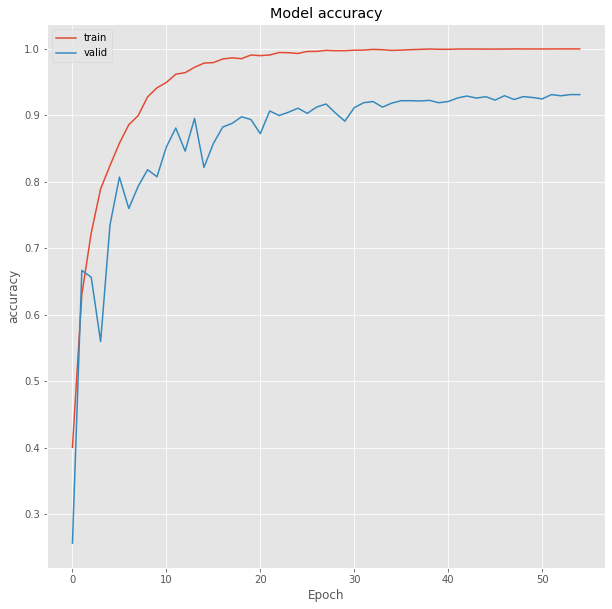

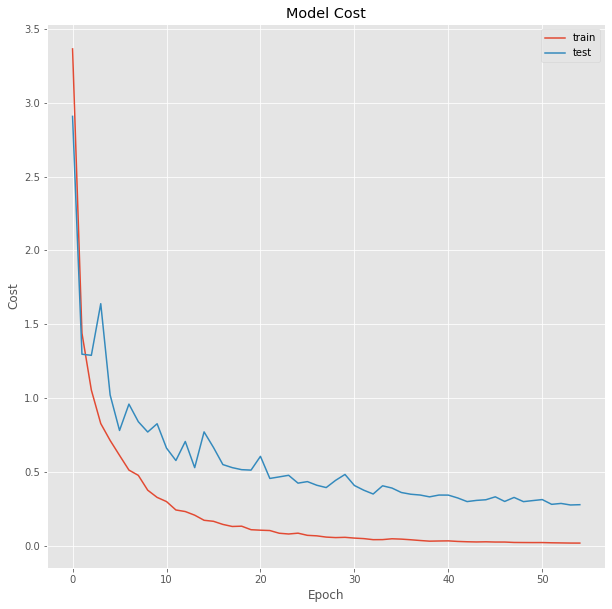

In [26]:
plt.figure(figsize = (10,10))
plt.plot(result.history['accuracy'], label='train')
plt.plot(result.history['val_accuracy'], label='valid')
plt.legend(loc='upper left')
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.show()
plt.figure(figsize = (10,10))
plt.plot(result.history['loss'], label='train')
plt.plot(result.history['val_loss'], label='test')
plt.legend(loc='upper right')
plt.title('Model Cost')
plt.ylabel('Cost')
plt.xlabel('Epoch')
plt.show()

### Evaluation on test set

In [27]:
valid = model.evaluate(X_test,Y_test,verbose=2)

10278/1 - 40s - loss: 0.1746 - accuracy: 0.9269


In [28]:
Records = []
Records.append(valid)

In [29]:
Records

[[0.29769996887261035, 0.9269313]]

### Making Predictions

In [30]:
predict = model.predict(X_test)
y_valid_pred_class = np.argmax(predict, axis = 1)

In [31]:
y_valid_pred_class

array([ 2,  8,  5, ...,  6,  2, 12])

In [32]:
Y_test

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [33]:
Y_test_A = np.argmax(Y_test, axis = 1)

In [34]:
Y_test_A

array([ 2,  8,  1, ...,  6,  2, 12])

In [35]:
cnf_matrix = confusion_matrix(Y_test_A, y_valid_pred_class)

In [36]:
cnf_matrix

array([[568,   0,   0,   0,   1,   0,   0,   0,   0,   1,   0,   0,   0,
          0,   0,   0,   0,   0,   7],
       [  0, 552,   1,   0,  20,   3,  22,   0,   8,   0,   0,   8,   2,
          1,   0,  10,   0,   0,   2],
       [  0,   1, 476,   1,   0,   0,   1,   0,   0,   1,  16,   1,   0,
          0,   0,   0,   7,   0,   1],
       [  1,   0,   2, 513,   0,   0,   1,   0,   0,   1,  11,   0,   0,
          0,   0,   0,  13,   0,   0],
       [  0,  20,   0,   0, 491,   2,  67,   0,   3,   0,   0,  10,   0,
          1,   1,   5,   0,   0,   0],
       [  0,   0,   0,   1,   5, 612,  28,   4,   0,   0,   1,   0,   4,
          4,   2,   0,   0,   7,   2],
       [  0,  18,   1,   1,  53,   8, 619,   0,   5,   0,   0,   3,   2,
          0,   0,  14,   0,   0,   0],
       [  0,   2,   0,   0,   0,   3,   2, 557,   1,   0,   0,   1,   4,
          0,   4,   0,   0,   2,   2],
       [  1,   4,   0,   0,   6,   0,   0,   1, 682,   1,   0,  14,   0,
          0,   6,   0,   0,   4

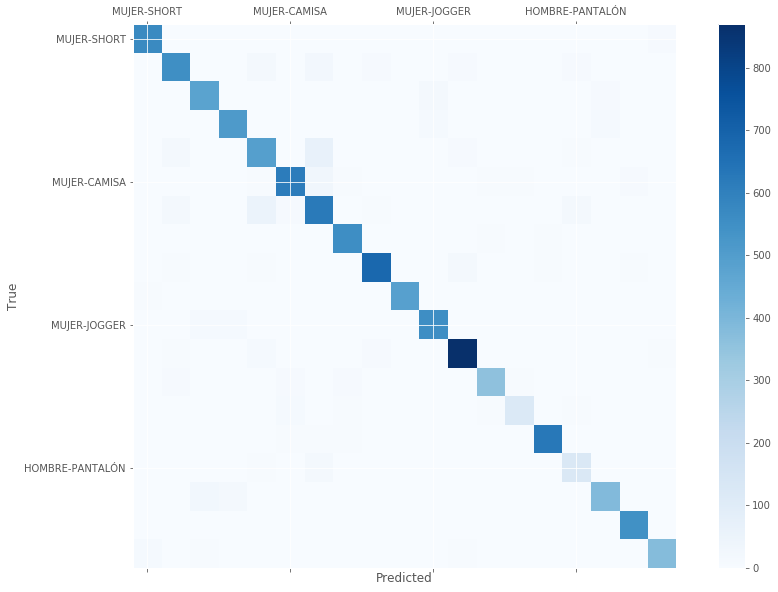

In [37]:
fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(111)
cax = ax.matshow(cnf_matrix,  cmap = 'Blues')
fig.colorbar(cax)
ax.set_xticklabels([''] + CATEGORIES)
ax.set_yticklabels([''] + CATEGORIES)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

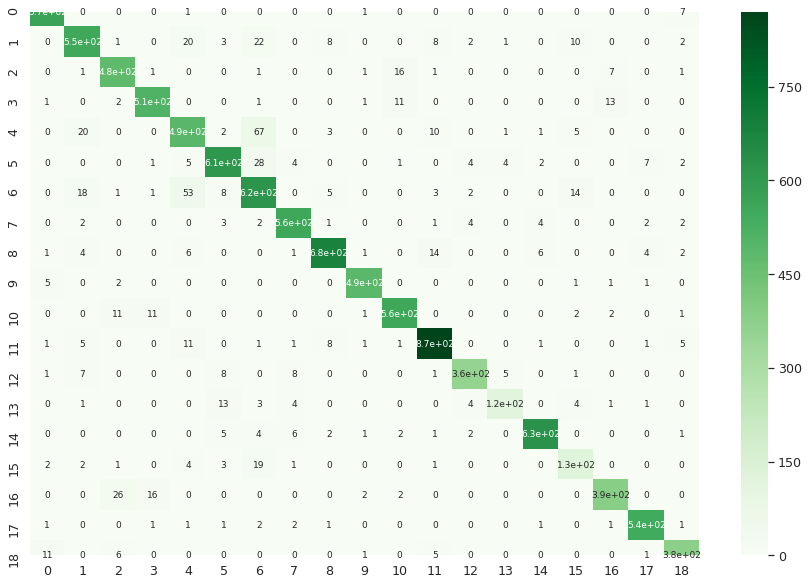

In [38]:
import seaborn as sn

plt.figure(figsize=(15,10))
df_cm = pd.DataFrame(cnf_matrix)

sn.set(font_scale=1.15) # for label size
sn.heatmap(df_cm, annot=True, cmap = 'Greens',annot_kws={"size": 9}) # font size